# 📱 Google Play Store Apps Analysis

## 1. Introduction
The Google Play Store hosts millions of apps, covering various categories, price models, and popularity levels. The goal of this project is to analyze app trends and provide insights into:

- The distribution of app ratings  
- The correlation between app installs and ratings  
- The most popular app categories  
- Free vs. paid app trends  

By performing **data cleaning, exploratory data analysis (EDA), and visualization**, we aim to uncover patterns that could be useful for developers, marketers, and business analysts.


# 2.Loading the Dataset

We'll make sure our imports are well-organized and include error handling.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/georg/Desktop/Google playstore dataset/googleplaystore.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset successfully loaded!")
except FileNotFoundError:
    print("Error: File not found. Check the path.")
    exit()
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

# Display first 5 rows
df.head()


Dataset successfully loaded!


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3.Data Cleaning & Preprocessing

We ensure data is cleaned before performing EDA.

In [2]:
# Checking for missing values
df.isnull().sum()

# Filling missing Ratings with the median
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# Dropping unnecessary rows
df.dropna(subset=['Type', 'Content Rating'], inplace=True)

# Cleaning 'Installs' and 'Reviews' columns
df['Installs'] = df['Installs'].str.replace('[,+]', '', regex=True).astype(float)
df['Reviews'] = df['Reviews'].str.replace(',', '', regex=True).astype(float)

# Cleaning 'Price' column and categorizing Free vs. Paid
df['Price'] = df['Price'].str.replace('$', '').astype(float)
df['Price_Type'] = df['Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')

print("Data cleaning completed!")


Data cleaning completed!


## Distribution of App Ratings

A histogram to show how ratings are distributed.

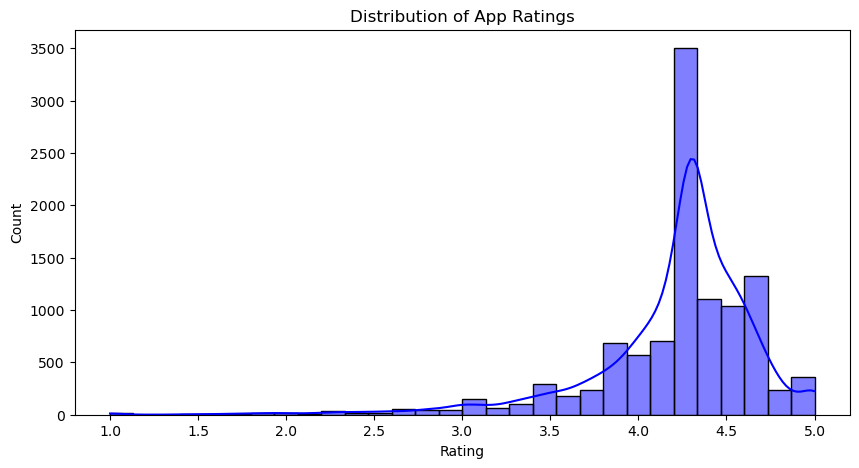

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], bins=30, kde=True, color="blue")
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Installs vs Rating Scatter Plot

To check if highly installed apps have better ratings.

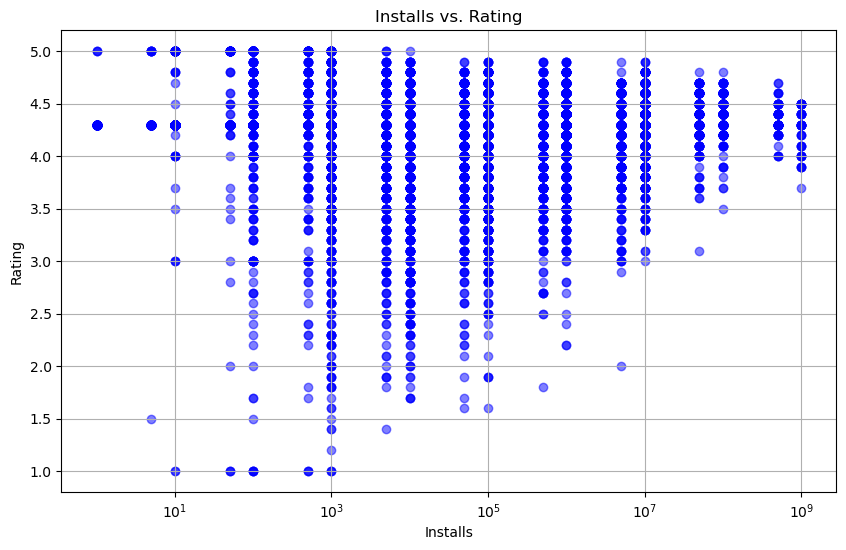

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Installs'], df['Rating'], alpha=0.5, c='blue')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Installs vs. Rating')
plt.xscale('log')  # Log scale for better visualization
plt.grid(True)
plt.show()


## Most Popular Categories

A bar chart to show the most popular app categories.

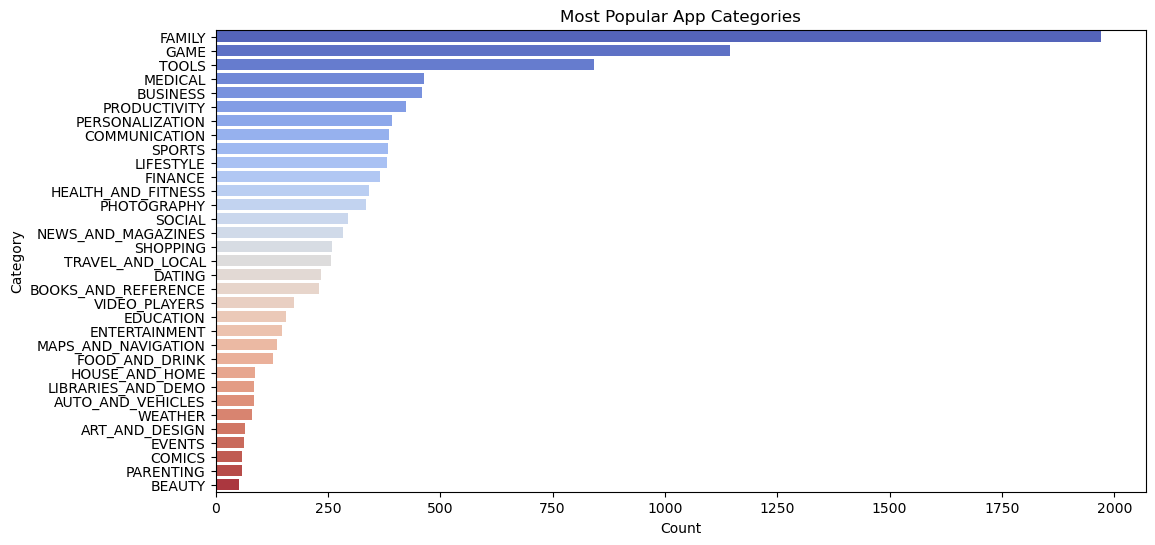

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="coolwarm")
plt.title("Most Popular App Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


## Free vs Paid Apps

We visualize the number of free vs paid apps.

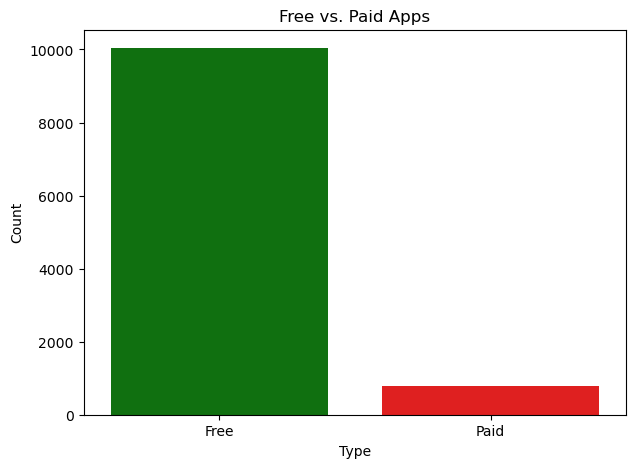

In [6]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df['Price_Type'], palette=['green', 'red'])
plt.title("Free vs. Paid Apps")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


## 🎯 Insights & Conclusion

- The **majority of apps** have a rating between **4.0 and 4.5**, indicating that most apps receive **positive feedback**.
- The **most downloaded apps** tend to have **higher ratings**, but not always.
- **Game, Business, and Productivity** apps are the **most popular** categories.
- **Free apps dominate** the Play Store, but **paid apps tend to have higher ratings** on average.

These insights can help **app developers** make data-driven decisions about pricing, category selection, and user engagement strategies.
